# Resultados de las Simulaciones

En este cuaderno se mostrarán los resultados de las simulaciones

In [5]:

import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/home/agusa/docs/repos/simu/coffee_shop_sales_simulation')
from main import main


## 2. Ejecutar la Simulación

En primer lugar ejecutaremos la simulación. Para ello deberemos completar las condiciones iniciales (cantidad de empeleados que atienden clientes, cantidad de empleados que muelen café y tiempo total de la simulación)

Ejecutando sin argumentos, se le pedirá ingresar dicha configuración mediante inputs.
Se le pueden pasar argumentos para hacerlo más simple.

Primer argumento: cantidad de empleados que atienden a los clientes
Segundo argumento: cantidad de empleados que muelen café
Tercer argumento: tiempo de ejecución de la simulación, en días de trabajo
Cuarto argumento: "quiet" si se quiere evitar impresiones por consola de los resultados

In [6]:
winterSimulation, springSimulation = main(
    defaultServingEmployees=2, 
    defaultGrindingEmployees=1, 
    defaultSimulationTime=365,
    defaultOutput="quiet"
)

--------------------------------------------------------------------------


### Para graficar los resultados

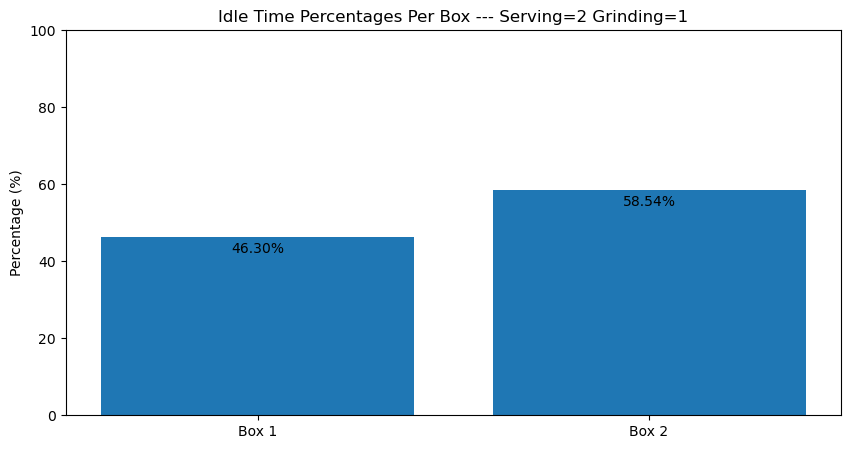

In [7]:
winterSimulation.results.plotIdleTime()

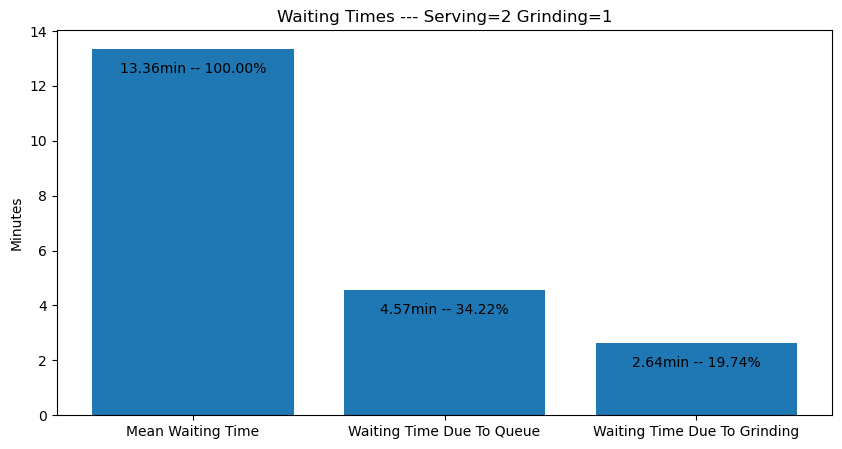

In [8]:
winterSimulation.results.plotWaitingTimes()

### Para imprimirlos como una tabla

In [9]:
winterSimulation.results.printTable()


,Metric,Value
0,Serving Employees,2.000000
1,Grinding Employees,1.000000
2,Total Customers,18962.000000
3,Mean Idle Time Percentage,52.422120
4,Mean Waiting Time (minutes),13.000000
5,Waiting Time Due To Queue (minutes),4.571062
6,Waiting Time Due To Queue (%),34.221305
7,Waiting Time Due To Grinding (minutes),2.637134
8,Waiting Time Due To Grinding (%),19.742933
9,Clients that had to wait due to grinding (%),33.445839


## Escenarios Invierno

Ahora realizaremos tres ejecuciones de la simulación modificando las variables de control en cada caso para comparar los resulados. En esta sección simularemos la tienda de café durante un invierno

In [10]:
simulationTime = 3650 # 10 work years

winterSimulation_1_1, _ = main(1,1, simulationTime, "Winter", "quiet")
winterSimulation_1_3, _ = main(1,3, simulationTime, "Winter", "quiet")
winterSimulation_6_1, _ = main(6,1, simulationTime, "Winter", "quiet")
winterSimulation_2_1, _ = main(2,1, simulationTime, "Winter", "quiet")

simulations = [winterSimulation_1_1, winterSimulation_1_3, winterSimulation_6_1, winterSimulation_2_1]


--------------------------------------------------------------------------
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--------------------------------------------------------------------------


Procedemos a comparar los resultados

In [11]:

winterResultsTable = pd.concat(map(lambda sim: sim.results.oneLineTable(), simulations), ignore_index=True)
winterResultsTable.index = ["S=1 G=1", "S=1 G=3", "S=6 G=1", "S=2 G=1"]
winterResultsTable

,Serving Employees,Grinding Employees,Total Customers,Mean Idle Time Percentage (%),Mean Waiting Time (minutes),Waiting Time Due To Queue (minutes),Waiting Time Due To Queue (%),Waiting Time Due To Grinding (minutes),Waiting Time Due To Grinding (%),Clients that had to wait due to grinding (%),Grinded Coffee Ratio
S=1 G=1,1,1,192796,2.494163,696,688.010280,98.728083,2.733077,0.392191,43.220814,0.999993
S=1 G=3,1,3,192703,32.505807,17,11.147213,64.495886,0.000000,0.000000,0.000000,0.433908
S=6 G=1,6,1,192400,83.798381,8,0.014778,0.166735,2.714725,30.629447,31.879418,0.999982
S=2 G=1,2,1,192658,51.207702,13,4.804143,35.122203,2.738075,20.017557,34.647406,0.999996


Graficamos los tiempos ociosos promedio

<Axes: >

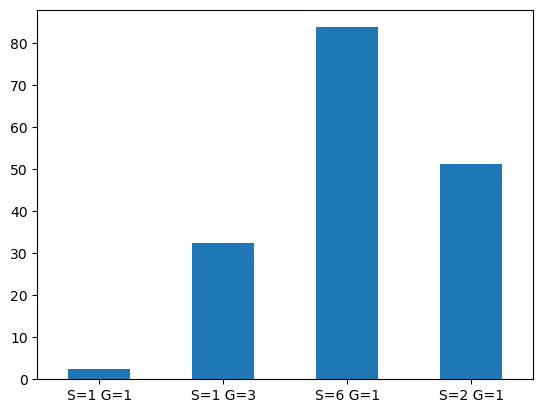

In [12]:
winterResultsTable["Mean Idle Time Percentage (%)"].plot(kind="bar", rot=0)

Graficamos los tiempos de espera y sus componentes

In [13]:
def plotSeries(series):
    series.plot(kind="bar", rot=0)
    for i in range(len(series)):
        plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


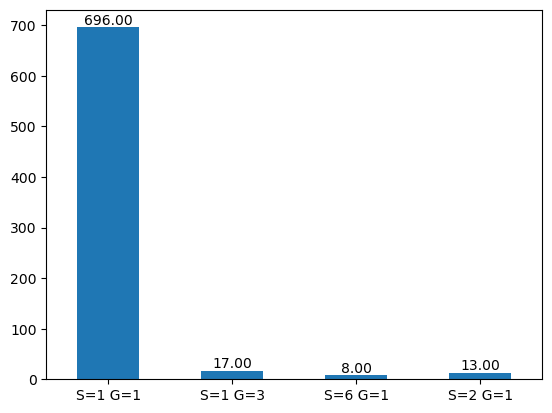

In [14]:
plotSeries(winterResultsTable["Mean Waiting Time (minutes)"])

/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


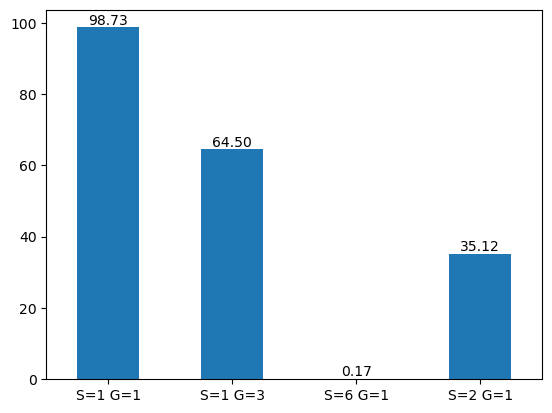

In [15]:
plotSeries(winterResultsTable["Waiting Time Due To Queue (%)"])

/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


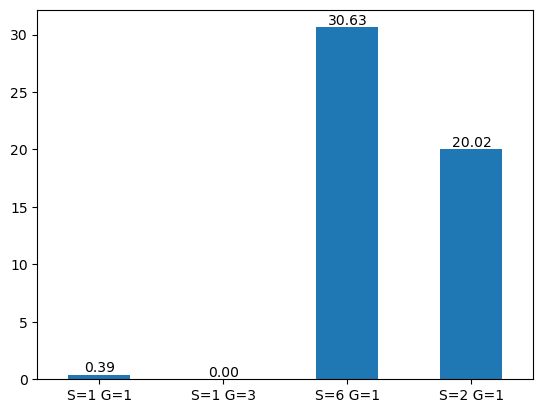

In [16]:
plotSeries(winterResultsTable["Waiting Time Due To Grinding (%)"])

/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


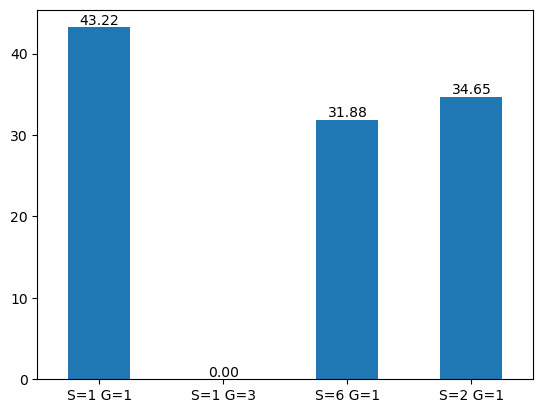

In [17]:
plotSeries(winterResultsTable["Clients that had to wait due to grinding (%)"])


/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


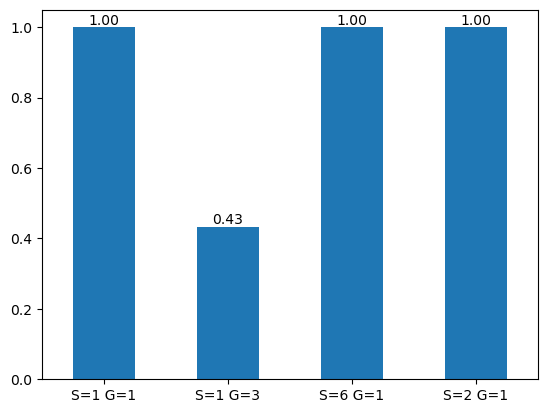

In [18]:
plotSeries(winterResultsTable["Grinded Coffee Ratio"])

## Escenarios Primavera

Ahora realizaremos tres ejecuciones de la simulación modificando las variables de control en cada caso para comparar los resulados. En esta sección simularemos la tienda de café durante una primavera

In [19]:
simulationTime = 3650 # 10 work years

_, springSimulation_2_1 = main(2,1, simulationTime, "Spring", "quiet")
_, springSimulation_8_1 = main(8,1, simulationTime, "Spring", "quiet")
_, springSimulation_2_5 = main(2,5, simulationTime, "Spring", "quiet")
_, springSimulation_3_2= main(3,2, simulationTime, "Spring", "quiet")

simulations = [springSimulation_2_1, springSimulation_8_1, springSimulation_2_5, springSimulation_3_2]


--------------------------------------------------------------------------
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--------------------------------------------------------------------------


Procedemos a comparar los resultados

In [20]:

springResultsTable = pd.concat(map(lambda sim: sim.results.oneLineTable(), simulations), ignore_index=True)
springResultsTable.index = ["S=2 G=2", "S=8 G=2", "S=3 G=5", "S=3 G=2"]
springResultsTable

,Serving Employees,Grinding Employees,Total Customers,Mean Idle Time Percentage (%),Mean Waiting Time (minutes),Waiting Time Due To Queue (minutes),Waiting Time Due To Queue (%),Waiting Time Due To Grinding (minutes),Waiting Time Due To Grinding (%),Clients that had to wait due to grinding (%),Grinded Coffee Ratio
S=2 G=2,2,1,322955,0.001621,87248,87236.463343,99.986297,5.828941,0.006681,67.808209,0.999997
S=8 G=2,8,1,322374,71.162539,12,0.050834,0.403885,6.398465,50.837176,66.899936,0.999995
S=3 G=5,2,5,321367,43.738918,9,2.930607,32.328738,0.000000,0.000000,0.000000,0.433748
S=3 G=2,3,2,322510,56.559280,8,1.509811,17.578190,0.950386,11.065005,11.888624,0.999932


Graficamos los tiempos ociosos promedio

<Axes: >

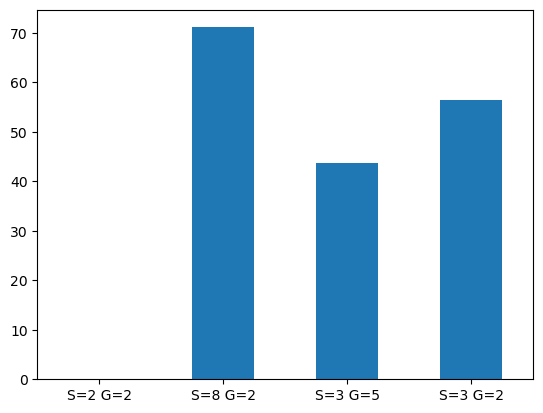

In [21]:
springResultsTable["Mean Idle Time Percentage (%)"].plot(kind="bar", rot=0)

Graficamos los tiempos de espera y sus componentes

In [22]:
def plotSeries(series):
    series.plot(kind="bar", rot=0)
    for i in range(len(series)):
        plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


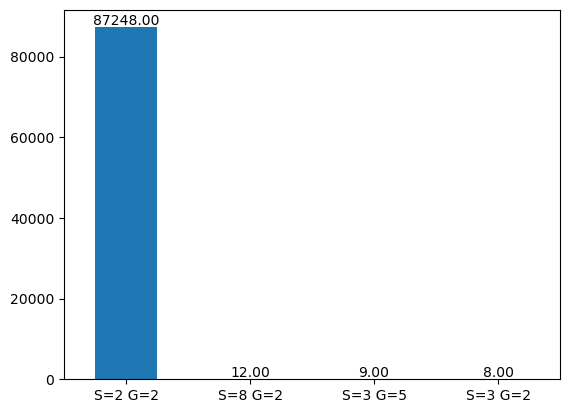

In [23]:
plotSeries(springResultsTable["Mean Waiting Time (minutes)"])

/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


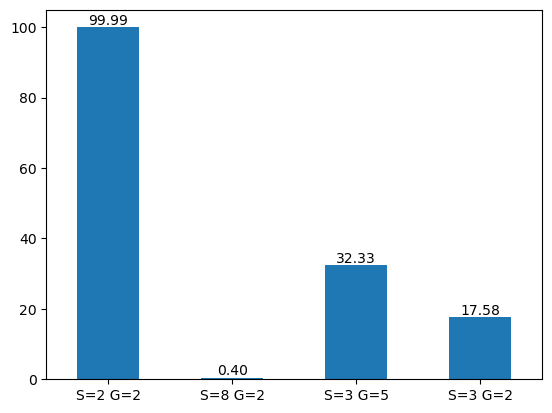

In [24]:
plotSeries(springResultsTable["Waiting Time Due To Queue (%)"])

/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


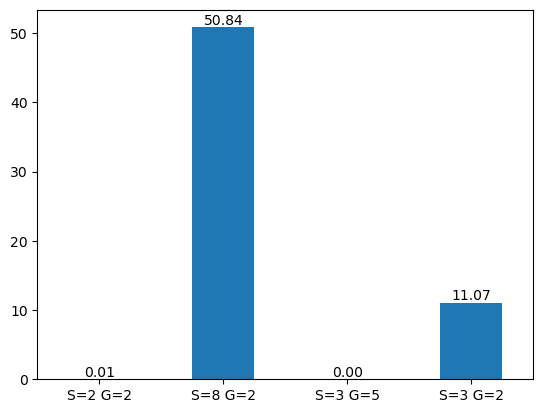

In [25]:
plotSeries(springResultsTable["Waiting Time Due To Grinding (%)"])

/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


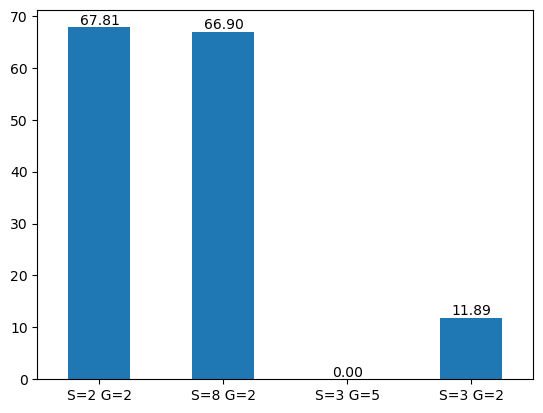

In [26]:
plotSeries(springResultsTable["Clients that had to wait due to grinding (%)"])


/tmp/ipykernel_181045/2362432971.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, series[i], f'{series[i]:.2f}', ha='center', va='bottom')


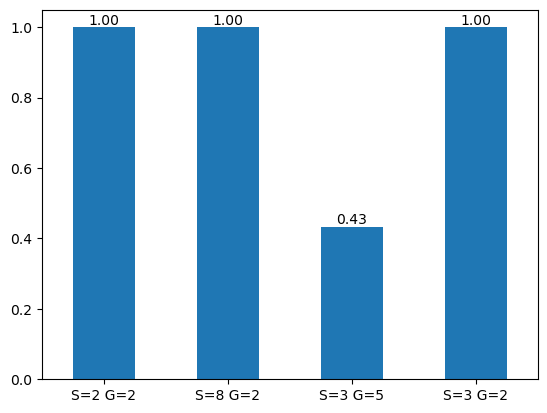

In [27]:
plotSeries(springResultsTable["Grinded Coffee Ratio"])

## Conclusiones

Dados los resultados vistos anteriormente y sus gráficos, las mejores combinaciones de las variables de control son aquellas en las que el tiempo de espera no es muy alto (para cualquier motivo - cola o molienda), pero a su vez mantiene un tiempo de ocio mínimo y un ratio de granos molidos y consumidos cercano a 1

### Mejor opción Invierno

La mejor opción de invierno es la que posee
- Cantidad de Empleados Atendiendo Clientes: 2
- Cantidad de Empleados Moliendo Granos: 1

In [28]:
bestWinterSimulation = winterSimulation_2_1

bestWinterSimulation.results.printTable()

,Metric,Value
0,Serving Employees,2.000000
1,Grinding Employees,1.000000
2,Total Customers,192658.000000
3,Mean Idle Time Percentage,51.207702
4,Mean Waiting Time (minutes),13.000000
5,Waiting Time Due To Queue (minutes),4.804143
6,Waiting Time Due To Queue (%),35.122203
7,Waiting Time Due To Grinding (minutes),2.738075
8,Waiting Time Due To Grinding (%),20.017557
9,Clients that had to wait due to grinding (%),34.647406


El promedio de espera en la cola es de 4 minutos y medio, suficientemente bajo.
- Agregar un empleado más pondría muy alto el valor de tiempo de ocio.
- Quitar un empleado genera que el tiempo en la cola supere los 11 minutos

El ratio de granos molidos vs consumidos es muy bueno
- No se produce más de lo necesario. Agregar un empleado más moliendo lo lleva a un valor de 0,6 (se produce casi el doble de lo consumido)

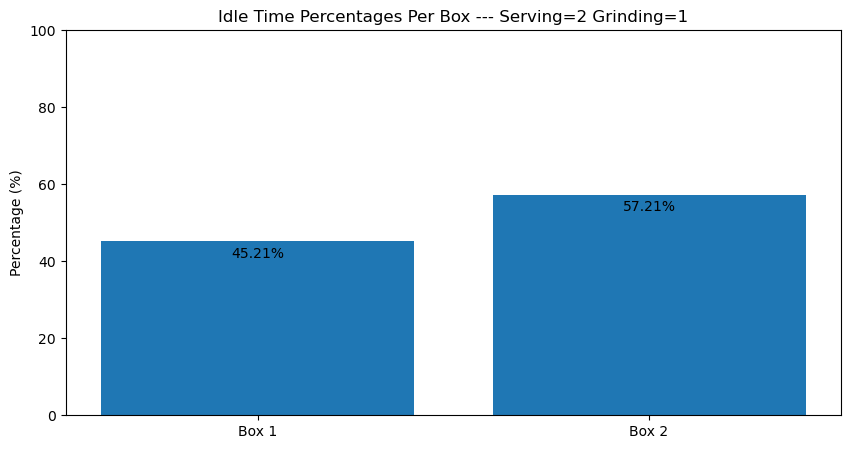

In [29]:
bestWinterSimulation.results.plotIdleTime()

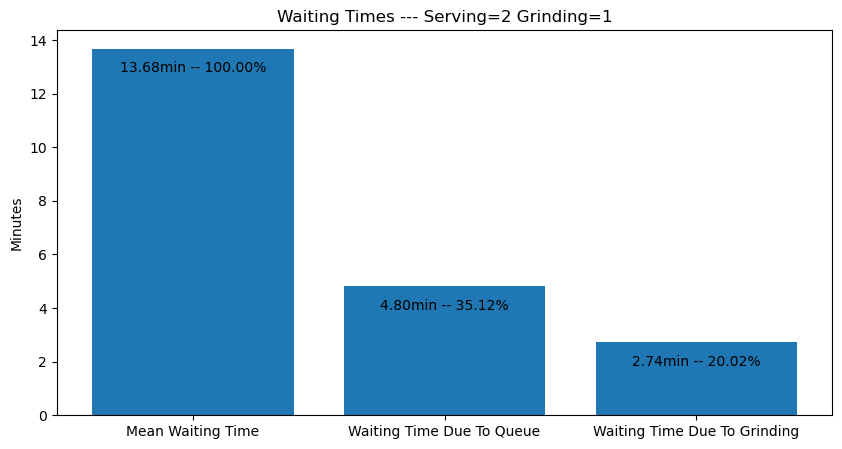

In [30]:
bestWinterSimulation.results.plotWaitingTimes()

### Mejor opción Primavera

La mejor opción de primavera es la que posee
- Cantidad de Empleados Atendiendo Clientes: 3
- Cantidad de Empleados Moliendo Granos: 2

In [31]:
bestSpringSimulation = springSimulation_3_2

bestSpringSimulation.results.printTable()

,Metric,Value
0,Serving Employees,3.000000
1,Grinding Employees,2.000000
2,Total Customers,322510.000000
3,Mean Idle Time Percentage,56.559280
4,Mean Waiting Time (minutes),8.000000
5,Waiting Time Due To Queue (minutes),1.509811
6,Waiting Time Due To Queue (%),17.578190
7,Waiting Time Due To Grinding (minutes),0.950386
8,Waiting Time Due To Grinding (%),11.065005
9,Clients that had to wait due to grinding (%),11.888624


El promedio de espera en la cola es de minutos y medio, excelente.
- Agregar un empleado más pondría muy alto el valor de tiempo de ocio.
- Quitar un empleado genera que el tiempo en la cola llegue a los 10 minutos

El ratio de granos molidos vs consumidos es muy bueno
- No se produce más de lo necesario. Agregar un empleado más moliendo lo lleva a un valor de 0,7. No estaría mal, pero tampoco es necesario. Solo un 11% de los clientes deben esperar que se muela café.

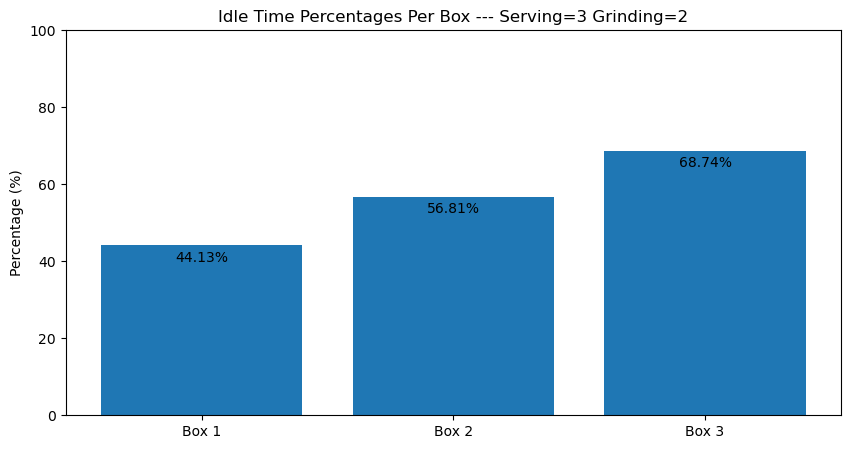

In [32]:
bestSpringSimulation.results.plotIdleTime()

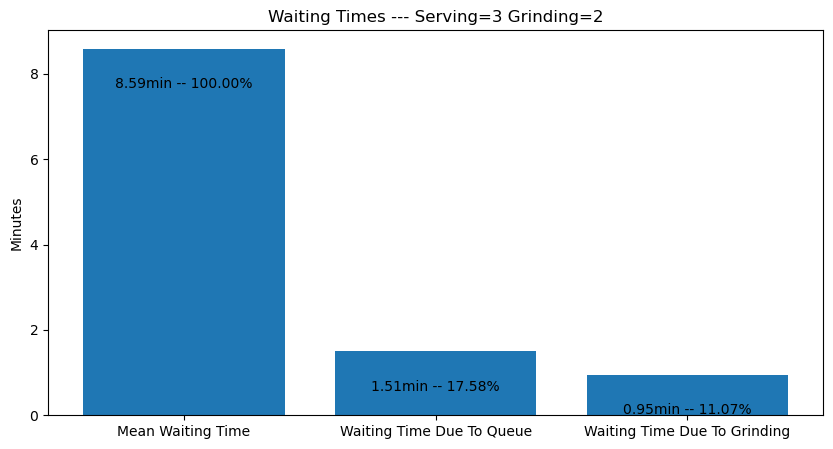

In [33]:
bestSpringSimulation.results.plotWaitingTimes()